# Cursos de Series de tiempo con *Machine Learning*
## Modulo 13.1. Forecasting Decision Tree
                        Elaborado por: Naren Castellon

<center><img src="imagen/Desicion_Tree_forecasting.png" width="900" height="500"></center>

# **Contenido**

1. Introducción
2. Definición del Modelo
3. Caso de estudio: Forecasting alquiler de bicicletas con informacion  meteorológica y estacional.
4. Cargando librerias y datos
5. Análisis Exploratorio de Datos
6. Modelando con Sklearn
7. Evaluar el rendimiento del modelo.
8. Conclusion

# Árbol de Decisión

En este cuaderno, vamos a descubrir el modelo de árbol de decisiones. Es uno de los modelos de **Machine Learning** no lineal más simples.

La idea detrás del modelo del árbol de decisiones se puede entender intuitivamente como una larga lista de declaraciones *if-else*. Esas decisiones *if-else* se usarían en la etapa de predicción: el modelo predice algún resultado $x$ si cierta condición es verdadera, y predecirá $y$ en caso contrario. Como puede ver, no existe una tendencia lineal en este tipo de lógica y, debido a esto, un modelo de árbol de decisión puede adaptarse a tendencias no lineales.

Veamos un ejemplo de esta lógica de árbol de decisión en la práctica, sin discutir aún de dónde proviene el árbol de decisión. La figura de abajo muestra un árbol de decisión de ejemplo que puede ayudarlo a comprender intuitivamente cómo podría funcionar un árbol de decisión. Muestra un árbol de decisión que pronostica la precipitación promedio según la zona climática y la estación.

<center><img src="imagen/split.png" width="900" height="500"></center>

## Matemáticas
Ahora descubrirá los componentes matemáticos y algorítmicos del algoritmo del árbol de decisión. Hay diferentes formas de ajustar los árboles de decisión, pero la más común es tener dos pasos: dividir (también llamado hacer crecer) el árbol y podarlo.

Un árbol de decisiones para regresión es un modelo que predice valores continuos dividiendo el espacio de características en regiones más pequeñas y ajustando un modelo simple (como la media) en cada región.

### Definición Formal

Un árbol de decisiones para regresión divide el espacio de características $\mathbb{R}^p $ en $ M $ regiones disjuntas $R_1, R_2, \ldots, R_M $. La predicción para una nueva observación $\mathbf{x} $ se realiza asignándola a una de estas regiones y utilizando la media de los valores de respuesta de las observaciones de entrenamiento en esa región.

Matemáticamente, el modelo se puede expresar como:

$$f(\mathbf{x}) = \sum_{m=1}^{M} c_m \mathbf{1}_{\{\mathbf{x} \in R_m\}} $$

donde:
- $\mathbf{x} $ es el vector de características de la nueva observación.
- $R_m$ es la $ m$-ésima región.
- $c_m $ es la media de los valores de respuesta en la región $R_m $.
- $ \mathbf{1}_{\{\mathbf{x} \in R_m\}} $ es una función indicadora que es 1 si $ \mathbf{x} $ pertenece a la región $ R_m $ y 0 en caso contrario.


## Splitting
Ahora que ha visto que el árbol de decisiones es simplemente una ordenación jerárquica de múltiples divisiones de decisiones, la pregunta lógica es de dónde provienen esas decisiones.

Todo comienza con un conjunto de datos en el que tiene una variable objetivo y múltiples variables explicativas. Ahora es posible una gran cantidad de divisiones, pero debe elegir una. La primera división debe ser la división que obtenga el error cuadrático medio más bajo. Al final, incluso un modelo con una sola división podría usarse como modelo predictivo.

Ahora que conoce el objetivo de su división, lo único que queda por hacer es probar cada división posible y evaluar cuál de ellas da como resultado el error cuadrático medio más bajo. Una vez que haya identificado la mejor primera división, obtendrá dos grupos. Luego repite este procedimiento para cada uno de los dos grupos, de modo que luego obtenga cuatro grupos y así sucesivamente.

En algún momento, no se puede dividir más. Este punto es cuando solo hay un punto de datos en cada grupo. Lógicamente, un solo punto de datos no se puede dividir.

La **división (splitting)** en el proceso de construcción de un árbol de decisiones es fundamental para crear nodos que segmenten los datos de manera óptima. Aquí tienes la definición formal matemática del proceso de división:

### Definición Formal de Splitting

El objetivo de la división es encontrar el punto de corte que minimice una medida de impureza en los nodos hijos resultantes. Para un nodo $t $ con $ N_t $ observaciones, la impureza se puede medir de diferentes maneras, dependiendo de si el árbol es para clasificación o regresión.

#### Para Regresión

El proceso de construcción del árbol implica seleccionar las divisiones (splits) que minimizan el error de predicción. Para un nodo $ t $ con $ N_t $ observaciones, el error cuadrático medio (MSE) se utiliza como criterio de división.

En el caso de un árbol de regresión, la impureza se mide comúnmente usando el **error cuadrático medio (MSE)**. La división se realiza de manera que se minimice la suma ponderada de los errores en los nodos hijos:

$$ \text{MSE}(t) = \frac{1}{N_t} \sum_{i \in t} (y_i - \bar{y}_t)^2 $$

donde:
- $ y_i $ es el valor de respuesta de la $ i $-ésima observación en el nodo $ t $.
- $ \bar{y}_t $ es la media de los valores de respuesta en el nodo $ t $.

La división óptima se encuentra minimizando:

$$ \text{MSE}(t) = \frac{N_{t_L}}{N_t} \text{MSE}(t_L) + \frac{N_{t_R}}{N_t} \text{MSE}(t_R) $$

donde:
- $t_{L}$ y $t_{R} $ son los nodos hijos izquierdo y derecho, respectivamente.
- $ N_{t_L} $ y $ N_{t_R} $ son el número de observaciones en los nodos hijos izquierdo y derecho, respectivamente.

#### Para Clasificación

En el caso de un árbol de clasificación, se utilizan medidas de impureza como la **entropía** o el **índice Gini**. Por ejemplo, el índice Gini se define como:

$$ Gini(t) = 1 - \sum_{k=1}^{K} p_{k}^2 $$

donde:
- $ p_{k} $ es la proporción de observaciones de la clase $ k $ en el nodo $ t $.
- $ K $ es el número total de clases.

La división óptima se encuentra minimizando la impureza ponderada de los nodos hijos:

$$ Gini(t) = \frac{N_{t_L}}{N_t} Gini(t_L) + \frac{N_{t_R}}{N_t} Gini(t_R) $$

### Proceso de División

1. **Seleccionar el Atributo y Punto de Corte**: Para cada atributo, se evalúan todos los posibles puntos de corte y se calcula la impureza resultante.
2. **Elegir la Mejor División**: Se selecciona el atributo y el punto de corte que minimizan la impureza en los nodos hijos.
3. **Dividir el Nodo**: El nodo se divide en dos nodos hijos basados en el punto de corte seleccionado.



## Podar y reducción de la complejidad del Árbol
Aunque es posible dejar que el árbol continúe dividiéndose hasta que sea imposible dividirlo más, no es necesariamente lo mejor que se puede hacer. También existe la posibilidad de permitir tener un poco más de puntos de datos en un grupo para evitar el sobreajuste.

Esto se puede obtener de múltiples maneras. Algunas implementaciones permiten un proceso de `Pruning`o `poda`, que primero obliga a un árbol a dividir todo por completo y luego agrega la fase de poda para cortar aquellas ramas que menos se necesitan.

La **poda (pruning)** en el proceso de construcción de un árbol de decisión es una técnica utilizada para reducir el tamaño del árbol eliminando nodos que no proporcionan información adicional significativa. Esto ayuda a evitar el sobreajuste y mejora la generalización del modelo. Aquí tienes la definición formal matemática de la poda:

### Definición Formal de Pruning

La poda se puede realizar de dos maneras principales: **poda previa (pre-pruning)** y **poda posterior (post-pruning)**.

#### Poda Previa (Pre-pruning)

La poda previa implica detener el crecimiento del árbol antes de que se complete. Esto se hace estableciendo criterios de parada, como:

1. **Profundidad máxima del árbol** $( \text{max\_depth} )$: Limita la profundidad del árbol.
2. **Número mínimo de muestras para dividir un nodo** $( \text{min\_samples\_split} )$: Un nodo solo se divide si contiene al menos este número de muestras.
3. **Número mínimo de muestras en un nodo hoja** $( \text{min\_samples\_leaf} )$: Un nodo hoja debe contener al menos este número de muestras.
4. **Reducción mínima de impureza** $( \text{min\_impurity\_decrease} )$: Un nodo solo se divide si la división reduce la impureza en al menos este valor.

#### Poda Posterior (Post-pruning)

La poda posterior implica primero construir el árbol completo y luego eliminar nodos que no mejoran significativamente el rendimiento del modelo. Un método común de poda posterior es la **poda de costo-complejidad (cost-complexity pruning)**.

##### Poda de Costo-Complejidad

La poda de costo-complejidad se basa en minimizar una función de costo que equilibra el error de entrenamiento y la complejidad del árbol. La función de costo se define como:

$$ C_\alpha(T) = R(T) + \alpha |T| $$

donde:
- $ R(T) $ es el error de entrenamiento del árbol $ T $.
- $ |T| $ es el número de nodos terminales (hojas) en el árbol $ T $.
- $ \alpha $ es un parámetro que controla la penalización por la complejidad del árbol.

El objetivo es encontrar el subárbol $ T \subseteq T_0 $ que minimice $ C_\alpha(T) $, donde $ T_0 $ es el árbol completo.

### Proceso de Poda de Costo-Complejidad

1. **Calcular el error de entrenamiento** $ R(t) $ para cada nodo $ t $.
2. **Calcular el costo-complejidad** $ C_\alpha(t) $ para cada nodo $ t $.
3. **Eliminar nodos** que no reducen significativamente el costo-complejidad.
4. **Repetir** hasta que se alcance el árbol óptimo.

Otras implementaciones le permiten simplemente agregar un parámetro de complejidad que evitará directamente que los árboles se vuelvan demasiado detallados. Este es un parámetro que es una excelente opción para optimizar usando un `GridSearchcv`.

## Ejemplo
En este cuaderno, trabajará con datos que provienen de una empresa de bicicletas compartidas. 

Este será un ejemplo difícil. En este conjunto de datos, predecirá la cantidad de usuarios de bicicletas de alquiler por día. Y como puedes imaginar, esto dependerá fuertemente del clima. Como he sabido, el clima es difícil de predecir, y si su pronóstico tiene una fuerte correlación con el clima, sabe que será un gran desafío.


## 1-1. Importar los datos de la bicicleta

In [0]:
# Manipulación y procesamiento de Datos
# ==============================================================================
import pandas as pd
import numpy as np

# Plot - Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('ggplot')

# No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)#Visualizamos todas las columnas

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/day.csv').iloc[:,1:]
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [0]:
data.isnull().sum()

Out[4]: dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [0]:
data['dteday'] = pd.to_datetime(data['dteday'])

In [0]:
#DataFrame['Year'] = data["dteday"].dt.year
data["year"]=data["dteday"].dt.year

In [0]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011


# Análisis Exploratorio de Datos

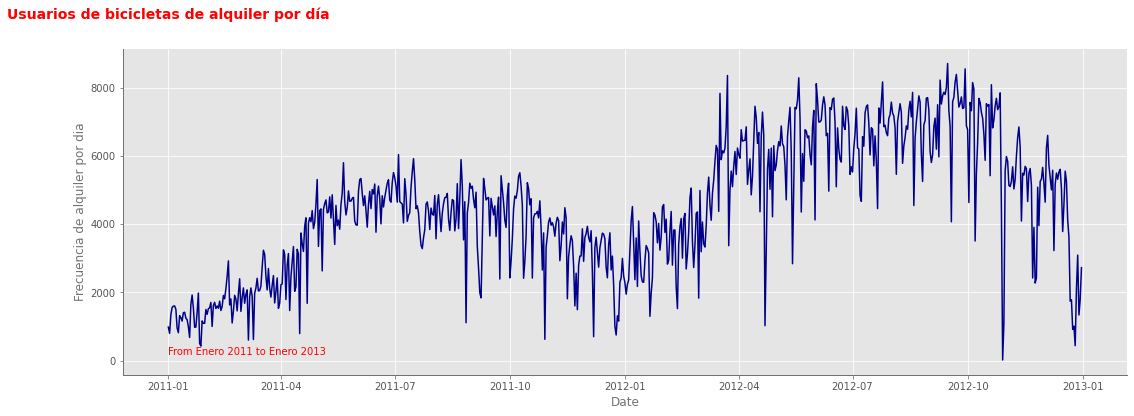

In [0]:
# Set the figure and axes
fig, ax = plt.subplots(figsize=(18,6))

# Plot the sales trend across the date
sns.lineplot(x = data["dteday"], y = 'cnt', data = data, ci=None, color='darkblue', ax=ax)

# Despine the right side
sns.despine(right=True)

# Set the label
ax.set_xlabel('Date', color='#6F7378')
ax.set_ylabel('Frecuencia de alquiler por dia', color='#6F7478')

# Change the spine color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Set the title
ax.set_title('Usuarios de bicicletas de alquiler por día', weight='bold', pad=30, size=14, x=-0.115,
             color='Red', ha='left')
ax.text(s='From Enero 2011 to Enero 2013', x = pd.Timestamp('2011-01-01'), y = 160, color ='red' )

# Change tick color
ax.tick_params(color='#6F7378')

plt.show()

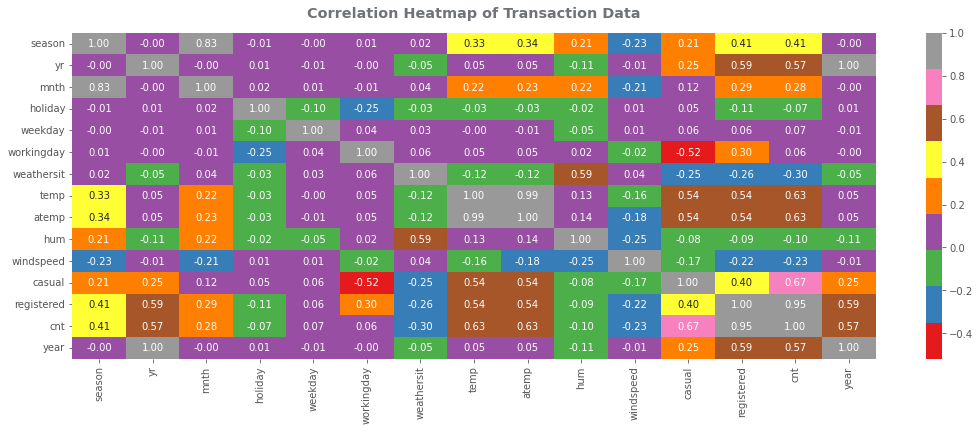

In [0]:
# Set the figure and axes
fig, ax = plt.subplots(figsize=(18,6))

# Create the correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap = 'Set1',
            fmt='.2f', ax=ax)

# Add title
ax.set_title('Correlation Heatmap of Transaction Data', pad=15, weight='bold', color='#6F7378')

plt.show()

In [0]:
data['Day'] = data['dteday'].dt.day_name().astype('category')
data['Month'] = data['dteday'].dt.month_name().astype('category')

In [0]:
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Day'] = pd.Categorical(data['Day'], categories=day_ordered, ordered=True)

month_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

data['Month'] = pd.Categorical(data['Month'], categories=month_ordered, ordered=True)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,Day,Month
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,Saturday,January
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,Sunday,January
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,Monday,January
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,Tuesday,January
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,Wednesday,January


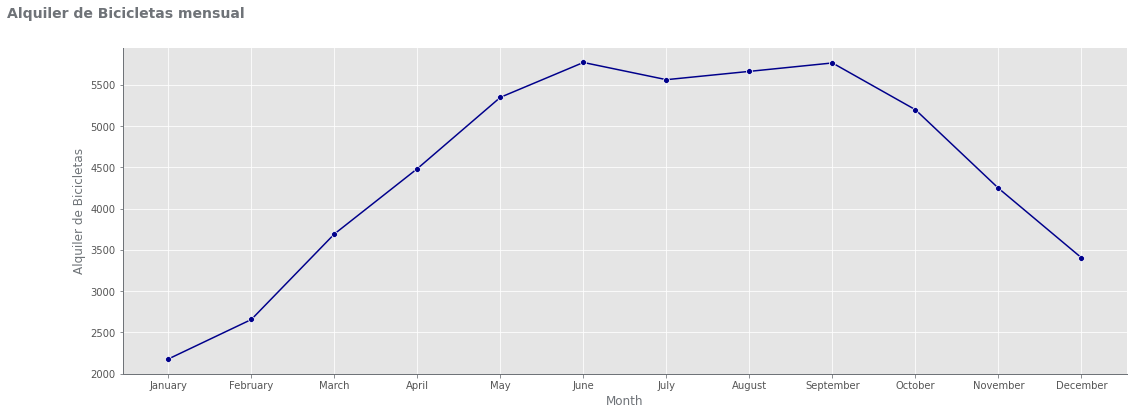

In [0]:
# Set the figure and axes
fig, ax = plt.subplots(figsize=(18,6))

# Plot the sales trend across the date
sns.lineplot(x = 'Month', y='cnt', data= data, ci=None, marker='o', color='darkblue', ax=ax)

# Despine the right side
sns.despine(right=True)

# Set the label
ax.set_xlabel('Month', color='#6F7378')
ax.set_ylabel('Alquiler de Bicicletas', color='#6F7478')

# Change the spine color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Set the title
ax.set_title('Alquiler de Bicicletas mensual', weight='bold', pad=30, size=14, x=-0.115,
             color='#6F7378', ha='left')

# Change tick color
ax.tick_params(color='#6F7378')

plt.show()

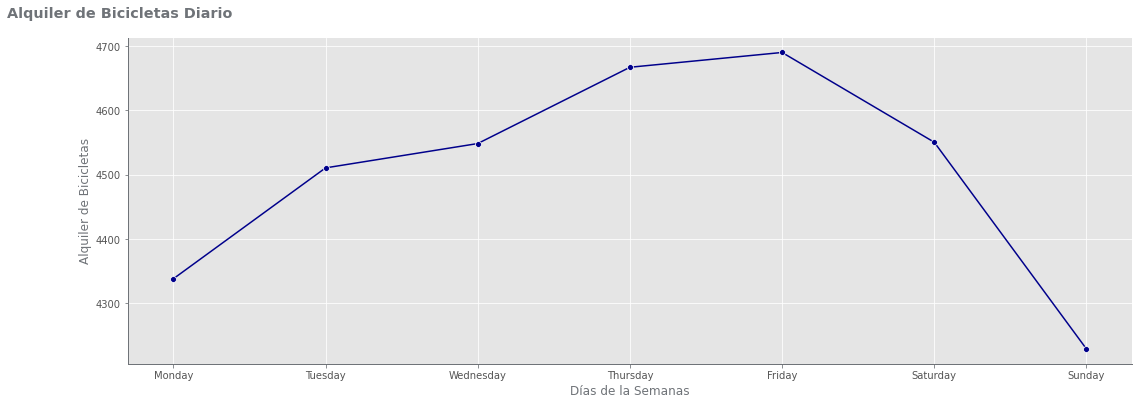

In [0]:
# Set the figure and axes
fig, ax = plt.subplots(figsize=(18,6))

# Plot the daily sales performance
sns.lineplot(x = 'Day', y = 'cnt', data = data, ci=None, color='darkblue',
             marker='o', ax=ax)

# Despine the right side
sns.despine(right=True)

ax.set_xlabel('Días de la Semanas', color='#6F7378')
ax.set_ylabel('Alquiler de Bicicletas', color='#6F7378')

for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

ax.set_title('Alquiler de Bicicletas Diario', pad=20, x=-0.12,
             weight='bold', color='#6F7378', ha='left')
ax.tick_params(color='#6F7378')

plt.show()

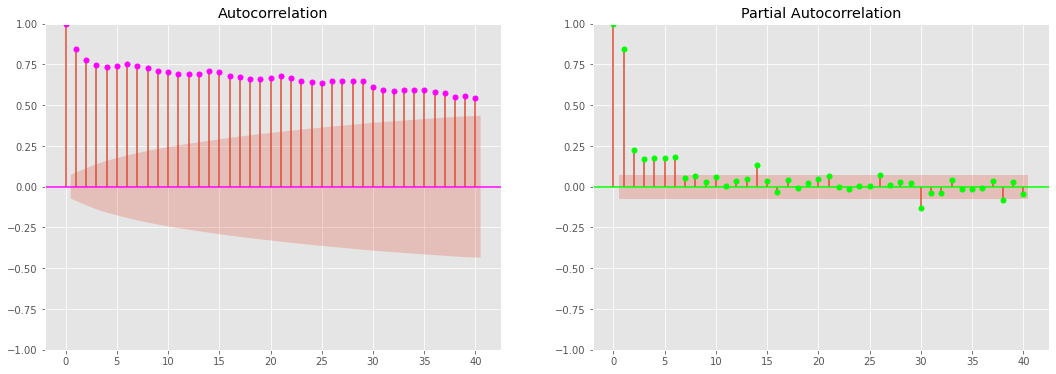

In [0]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

plot_acf(data["cnt"],  lags=40, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(data["cnt"],  lags=40, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

#plt.savefig("Gráfico de Densidad y qq")
plt.show();

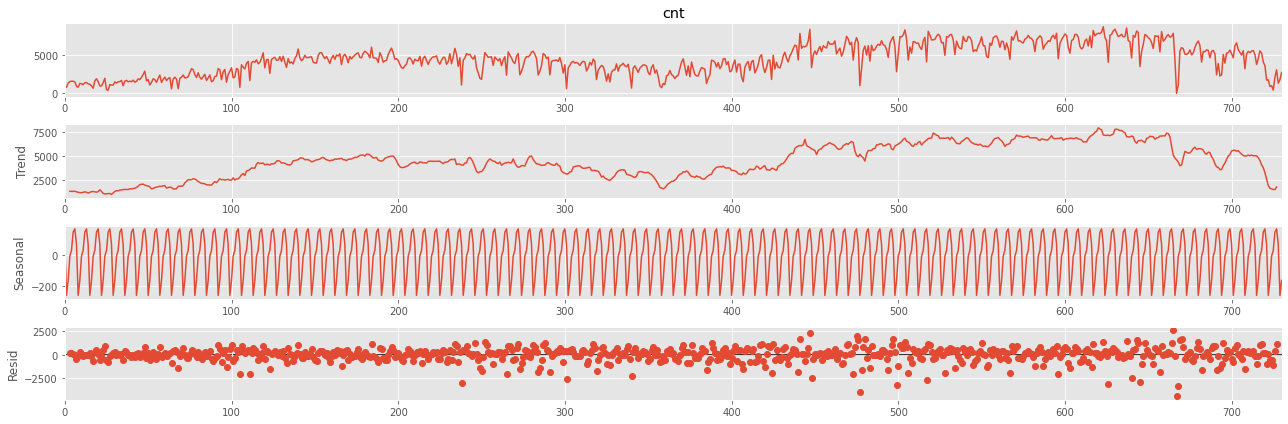

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose 
plt.rcParams["figure.figsize"] = (18, 6)
a = seasonal_decompose(data["cnt"], model = "add", period = 7)
a.plot();

Como puede ver en el gráfico, muchas cosas están sucediendo aquí. Hay una tendencia difícil de estimar. También hay mucha variación día a día. Cuando observa el conjunto de datos, puede ver que hay muchos datos sobre el clima. Este va a ser el reto: el número de usuarios de bicicletas compartidas depende mucho del clima del día, pero el clima no es algo que puedas saber de antemano.

Lo único que puede hacer en tales casos es intentar hacer mucha ingeniería de características para crear muchas variables valiosas para el modelo. a continuación vamos utilizar algunas de las variables existentes y veremos cómo crear una serie de variables. La lista total de valores explicativos es la siguiente:

* Variable original 'temporada': (1:primavera, 2:verano, 3:otoño, 4:invierno)
* Variable original 'yr': El año
* Variable original 'mes': El mes
* Variable original 'vacaciones': Si el día es feriado
* Variable original 'día de la semana': El día de la semana
* Variable original 'día laborable': si el día es feriado/ fin de semana o dia laborable
* Los 7 últimos días de 'cnt': Un componente autorregresivo para el número de usuarios
* Los 7 últimos días de 'weathersit': El tiempo, del 4 (muy mal tiempo) al 1 (buen tiempo)
* Los 7 últimos días de ‘temperatura’
* Los 7 últimos días de ‘humedad’

También eliminará un valor atípico influyente en el conjunto de datos. Esta es una observación extrema, y es difícil entender por qué sucedió. Puede verlo en la Figura 12-2, como un pico muy bajo que ocurre en el índice 477. Como puede influir negativamente en el modelo, es mejor no incluirlo en los datos de entrenamiento.

Hay otro pico bajo en algún lugar entre 650 y 700, pero como esta parte de los datos será nuestro conjunto de prueba, sería injusto hacerle un tratamiento. Eliminar los valores atípicos del conjunto de prueba sería hacer trampa, ya que esto haría que nuestra puntuación de prueba fuera más alta que la realidad. El objetivo siempre es tener una estimación del error del modelo lo más confiable posible, para anticipar su comportamiento al aplicar el modelo en la práctica.

# **Modelo univariado**

## 1-2. Creando el conjunto de Datos de Entrenamiento

In [0]:
data.set_index("dteday", inplace = True)
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,Day,Month
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,Saturday,January
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,Sunday,January
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,Monday,January
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,Tuesday,January
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,Wednesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012,Thursday,December
2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012,Friday,December
2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012,Saturday,December


In [0]:
data = data.drop(["Day", "Month"], axis = 1)

In [0]:
data.columns

Out[33]: Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'year'],
      dtype='object')

In [0]:
#create sparksession object
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('serie_temporal').getOrCreate()

In [0]:
nuevo = spark.createDataFrame(data)
nuevo.show()

+------+---+----+-------+-------+----------+----------+--------+--------+--------+---------+------+----------+----+----+
|season| yr|mnth|holiday|weekday|workingday|weathersit|    temp|   atemp|     hum|windspeed|casual|registered| cnt|year|
+------+---+----+-------+-------+----------+----------+--------+--------+--------+---------+------+----------+----+----+
|     1|  0|   1|      0|      6|         0|         2|0.344167|0.363625|0.805833| 0.160446|   331|       654| 985|2011|
|     1|  0|   1|      0|      0|         0|         2|0.363478|0.353739|0.696087| 0.248539|   131|       670| 801|2011|
|     1|  0|   1|      0|      1|         1|         1|0.196364|0.189405|0.437273| 0.248309|   120|      1229|1349|2011|
|     1|  0|   1|      0|      2|         1|         1|     0.2|0.212122|0.590435| 0.160296|   108|      1454|1562|2011|
|     1|  0|   1|      0|      3|         1|         1|0.226957| 0.22927|0.436957|   0.1869|    82|      1518|1600|2011|
|     1|  0|   1|      0|      4

In [0]:
from pyspark.ml.feature import VectorAssembler

In [0]:
# Creamos el vector assembler             Variables independientes                         Vector 
vec_assmebler = VectorAssembler(inputCols= ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'year'],
    outputCol="features")

In [0]:
features_df = vec_assmebler.transform(nuevo)

In [0]:
#features_df.display()
features_df.show(5)

+------+---+----+-------+-------+----------+----------+--------+--------+--------+---------+------+----------+----+----+--------------------+
|season| yr|mnth|holiday|weekday|workingday|weathersit|    temp|   atemp|     hum|windspeed|casual|registered| cnt|year|            features|
+------+---+----+-------+-------+----------+----------+--------+--------+--------+---------+------+----------+----+----+--------------------+
|     1|  0|   1|      0|      6|         0|         2|0.344167|0.363625|0.805833| 0.160446|   331|       654| 985|2011|[1.0,0.0,1.0,0.0,...|
|     1|  0|   1|      0|      0|         0|         2|0.363478|0.353739|0.696087| 0.248539|   131|       670| 801|2011|[1.0,0.0,1.0,0.0,...|
|     1|  0|   1|      0|      1|         1|         1|0.196364|0.189405|0.437273| 0.248309|   120|      1229|1349|2011|[1.0,0.0,1.0,0.0,...|
|     1|  0|   1|      0|      2|         1|         1|     0.2|0.212122|0.590435| 0.160296|   108|      1454|1562|2011|[1.0,0.0,1.0,0.0,...|
|     

In [0]:
# Creamos una nueva tabla con el vector y la variable de salidad
model_df = features_df.select('features',"cnt")
model_df.show()

+--------------------+----+
|            features| cnt|
+--------------------+----+
|[1.0,0.0,1.0,0.0,...| 985|
|[1.0,0.0,1.0,0.0,...| 801|
|[1.0,0.0,1.0,0.0,...|1349|
|[1.0,0.0,1.0,0.0,...|1562|
|[1.0,0.0,1.0,0.0,...|1600|
|[1.0,0.0,1.0,0.0,...|1606|
|[1.0,0.0,1.0,0.0,...|1510|
|[1.0,0.0,1.0,0.0,...| 959|
|[1.0,0.0,1.0,0.0,...| 822|
|[1.0,0.0,1.0,0.0,...|1321|
|[1.0,0.0,1.0,0.0,...|1263|
|[1.0,0.0,1.0,0.0,...|1162|
|[1.0,0.0,1.0,0.0,...|1406|
|[1.0,0.0,1.0,0.0,...|1421|
|[1.0,0.0,1.0,0.0,...|1248|
|[1.0,0.0,1.0,0.0,...|1204|
|[1.0,0.0,1.0,1.0,...|1000|
|[1.0,0.0,1.0,0.0,...| 683|
|[1.0,0.0,1.0,0.0,...|1650|
|[1.0,0.0,1.0,0.0,...|1927|
+--------------------+----+
only showing top 20 rows



In [0]:
# Dividir los datos en entrenamiento y en datos de prueba
train_df,test_df = model_df.randomSplit([0.7,0.3])

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor

In [0]:
# construyo Linear Regression model 
dt_Reg = DecisionTreeRegressor(labelCol = 'cnt') # labelcol= la variable objetivo o Target 

In [0]:
# Se entrena el modelo
lr_model = dt_Reg.fit(train_df) # utliza los datos de entrenamiento

In [0]:
pred = lr_model.transform(test_df)
pred.show()

+--------------------+----+------------------+
|            features| cnt|        prediction|
+--------------------+----+------------------+
|[1.0,0.0,1.0,0.0,...|1416|            1464.0|
|[1.0,0.0,1.0,0.0,...|1501|            1464.0|
|[1.0,0.0,1.0,0.0,...|1562|            1464.0|
|[1.0,0.0,1.0,0.0,...|1650|            1813.2|
|[1.0,0.0,1.0,0.0,...|1927|            1813.2|
|[1.0,0.0,1.0,0.0,...|1543|            1464.0|
|[1.0,0.0,1.0,0.0,...|1510|            1464.0|
|[1.0,0.0,1.0,0.0,...|1167|1193.2727272727273|
|[1.0,0.0,1.0,0.0,...| 985|             873.5|
|[1.0,0.0,1.0,1.0,...|1000|             873.5|
|[1.0,0.0,2.0,0.0,...|1360|            1464.0|
|[1.0,0.0,2.0,0.0,...|1917|            1813.2|
|[1.0,0.0,2.0,0.0,...|2115|2156.1714285714284|
|[1.0,0.0,2.0,0.0,...|1605|            1813.2|
|[1.0,0.0,2.0,0.0,...|1538|            1464.0|
|[1.0,0.0,2.0,0.0,...|1472|            1642.4|
|[1.0,0.0,2.0,0.0,...|1635|            1642.4|
|[1.0,0.0,3.0,0.0,...|2471|            3165.0|
|[1.0,0.0,3.0

In [0]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "#f3f3af"}  # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

In [0]:
resultad2 = pred.select("cnt", "prediction").toPandas()
resultad2.head()

,cnt,prediction
0,1416,1464.0
1,1501,1464.0
2,1562,1464.0
3,1650,1813.2
4,1927,1813.2


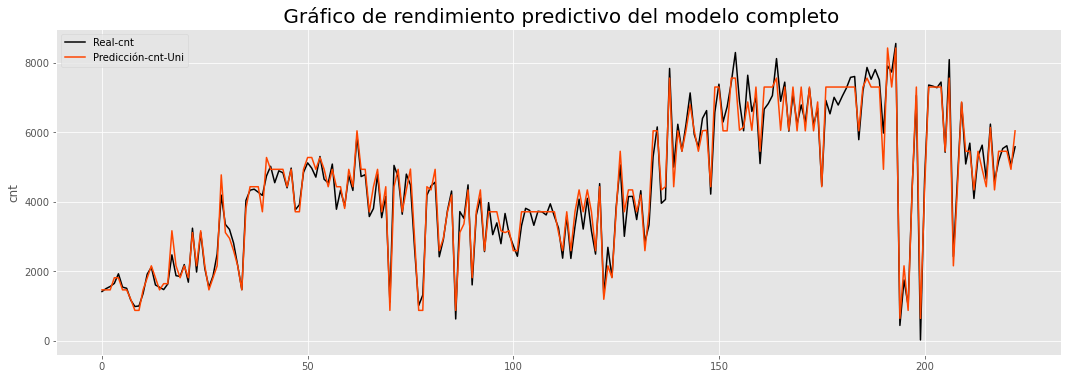

In [0]:
plt.figure(figsize=(18,6))
plt.plot(resultad2["cnt"],color = "black", label = "Real-cnt")
plt.plot(resultad2["prediction"],color = "orangered", label = "Predicción-cnt-Uni")
plt.title(" Gráfico de rendimiento predictivo del modelo completo", fontsize=20)
plt.xlabel('')
plt.ylabel("cnt")
plt.legend()
plt.show();

# Evaluemos el Modelo

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
# Performans Metric
evaluator = RegressionEvaluator(labelCol = "cnt", predictionCol="prediction")
lrRmse = evaluator.evaluate(pred, {evaluator.metricName: "rmse"})
lrMae = evaluator.evaluate(pred, {evaluator.metricName: "mae"})
lrR2 = evaluator.evaluate(pred, {evaluator.metricName: "r2"})
print(f"Linear Regression - RMSE: {lrRmse}")
print(f"Linear Regression - MAE: {lrMae}")
print(f"Linear Regression - R^2: {lrR2}")

Linear Regression - RMSE: 320.4920374597413
Linear Regression - MAE: 247.68642280966833
Linear Regression - R^2: 0.9734919173583495


## Conclusiones
* El modelo Decision Tree es uno de los modelos de aprendizaje automático supervisado no lineal más simples.
* Puede ajustar la complejidad del árbol de decisión, que define qué tan largo y complejo se vuelve un árbol de decisión.
* Los árboles complejos corren el riesgo de sobreajustarse: aprenden patrones demasiado detallados en los datos de entrenamiento. Puede utilizar una búsqueda de cuadrícula para optimizar la complejidad del árbol.
* Puede crear un dendrograma del árbol de decisión ajustado para obtener todas las divisiones y variables que ha utilizado su modelo.

# Referencia

1. https://en.wikipedia.org/wiki/Decision_tree_learning

2. L. Breiman, J. Friedman, R. Olshen, and C. Stone, “Classification and Regression Trees”, Wadsworth, Belmont, CA, 1984.

3. T. Hastie, R. Tibshirani and J. Friedman. “Elements of Statistical Learning”, Springer, 2009.

4. L. Breiman, and A. Cutler, “Random Forests”, https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

5. https://www.machinelearningplus.com/pyspark/install-pyspark-on-mac/#
